# *Analysis 3: ClubGames*
We analyze the third table, ClubGames, which contains data related to the __matches played by clubs__.
Display the first rows of the dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('../Datasets/club_games.csv')

df.head()

,game_id,club_id,own_goals,own_position,own_manager_name,opponent_id,opponent_goals,opponent_position,opponent_manager_name,hosting,is_win
0,2221751,431,1,NaN,Lutz Göttling,60,2,NaN,Christian Streich,Home,0
1,2221755,83,3,NaN,Ralph Hasenhüttl,4795,0,NaN,Tomas Oral,Home,1
2,2222597,3725,2,2.0,Stanislav Cherchesov,232,1,5.0,Unai Emery,Home,1
3,2222627,2696,0,11.0,Andrey Kobelev,4128,2,10.0,Rustem Khuzin,Home,0
4,2222658,2410,0,2.0,Leonid Slutski,121,2,13.0,Dan Petrescu,Home,0


The meaning of each __column__ is as follows:
- **game_id:** Unique identifier of the **match**.
- **club_id:** Identifier of the **home club**.
- **own_goals:** Number of **goals** scored by the **home** team.
- **own_position:** **League position** of the **home** team before the match.
- **own_manager_name:** Name of the **manager** of the **home** team.
- **opponent_id:** Identifier of the **opponent club**.
- **opponent_goals:** Number of **goals** scored by the **opponent** team.
- **opponent_position:** **League position** of the **opponent** team before the match.
- **opponent_manager_name:** Name of the **manager** of the **opponent** team.
- **hosting:** Indication if the match is played **at home** ("**Home**").
- **is_win:** Indication if the **home** team **won** the match (1 for **win**, 0 for loss or draw).


In [3]:
print('Numero di righe e colonne:', df.shape)

Numero di righe e colonne: (130432, 11)


It is noted from the number of rows that the dataset is used to __store dynamic data__.


Some __numeric values__ in the dataset may be useful if analyzed from a __statistical__ perspective.
We use __describe()__ for this purpose. But first, **remove** any **null** values to avoid **errors**.


In [4]:
df.isnull().sum()

game_id                      0
club_id                      0
own_goals                    0
own_position             38908
own_manager_name          1484
opponent_id                  0
opponent_goals               0
opponent_position        38908
opponent_manager_name     1484
hosting                      0
is_win                       0
dtype: int64

There are many rows with missing values. Therefore, we proceed with the __replacement__ of missing values with __meaningful__ values.
We opt to use __'Unknown'__ for manager names and __-1__ for league positions, thus keeping the data __consistent__.


In [5]:
df['own_position'] = df['own_position'].fillna(-1)
df['opponent_position'] = df['opponent_position'].fillna(-1)
df['own_manager_name'] = df['own_manager_name'].fillna('Unknown')
df['opponent_manager_name'] = df['opponent_manager_name'].fillna('Unknown')
df.isnull().sum()

game_id                  0
club_id                  0
own_goals                0
own_position             0
own_manager_name         0
opponent_id              0
opponent_goals           0
opponent_position        0
opponent_manager_name    0
hosting                  0
is_win                   0
dtype: int64

It is confirmed that there are no more null values in the dataset.
We resume with __describe()__, excluding the previously handled null values.


In [6]:
df[df.select_dtypes(include=['float64', 'int64']).ne(-1)].describe()

,game_id,club_id,own_goals,own_position,opponent_id,opponent_goals,opponent_position,is_win
count,1.304320e+05,130432.00000,130432.000000,91524.000000,130432.00000,130432.000000,91524.000000,130432.000000
mean,3.018125e+06,4681.76423,1.457365,9.364910,4681.76423,1.457365,9.364910,0.392703
std,5.605194e+05,10870.32151,1.402178,5.311624,10870.32151,1.402178,5.311624,0.488353
min,2.211607e+06,1.00000,0.000000,1.000000,1.00000,0.000000,1.000000,0.000000
25%,2.518596e+06,354.00000,0.000000,5.000000,354.00000,0.000000,5.000000,0.000000
50%,2.919854e+06,995.00000,1.000000,9.000000,995.00000,1.000000,9.000000,0.000000
75%,3.450800e+06,3060.00000,2.000000,14.000000,3060.00000,2.000000,14.000000,1.000000
max,4.228114e+06,112755.00000,19.000000,21.000000,112755.00000,19.000000,21.000000,1.000000


The integer variable __is_win__, although stored as an integer, is used as a __boolean__ value to indicate the win or loss of a home team. We use this to create a bar chart showing the percentage of home and away wins.


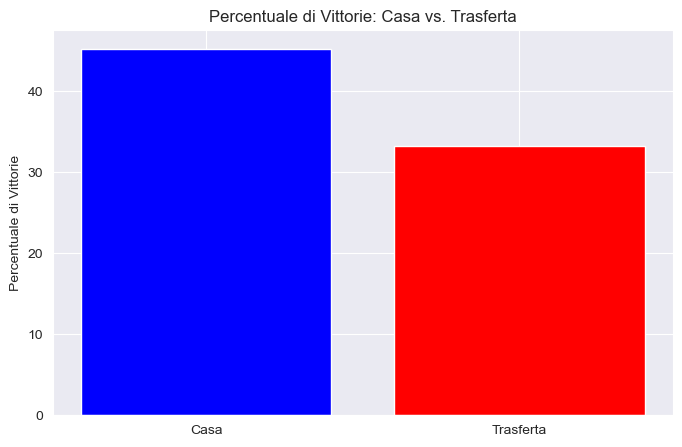

In [7]:
home_wins = df[df['hosting'] == 'Home']['is_win'].mean() * 100
away_wins = df[df['hosting'] == 'Away']['is_win'].mean() * 100

labels = ['Casa', 'Trasferta']
values = [home_wins, away_wins]

plt.figure(figsize=(8, 5))
plt.bar(labels, values, color=['blue', 'red'])
plt.title('Percentuale di Vittorie: Casa vs. Trasferta')
plt.ylabel('Percentuale di Vittorie')
plt.show()

Another piece of data available for each match is the __position__ in the league of both the home team and the opponent team.
We calculate the average position of clubs in __wins__ and __losses__. 
The data is displayed in a __bar chart__.


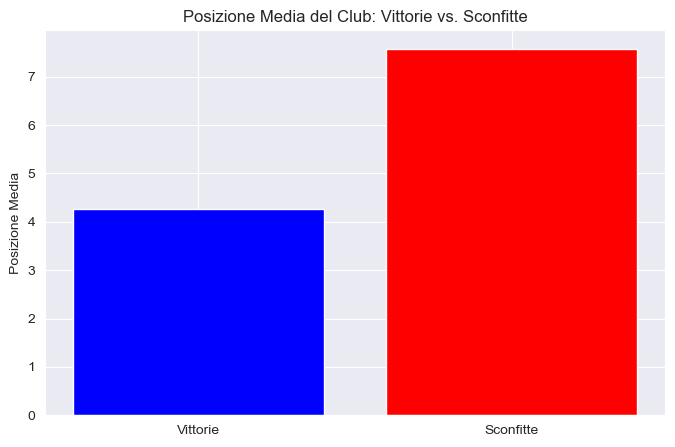

In [8]:
avg_position_win = df[df['is_win'] == 1]['own_position'].mean()
avg_position_loss = df[df['is_win'] == 0]['own_position'].mean()

labels = ['Vittorie', 'Sconfitte']
values = [avg_position_win, avg_position_loss]

plt.figure(figsize=(8, 5))
plt.bar(labels, values, color=['blue', 'red'])
plt.title('Posizione Media del Club: Vittorie vs. Sconfitte')
plt.ylabel('Posizione Media')
plt.show()

To complete the above chart, we use a __boxplot__. 
This provides additional details on the __distribution of the data__ and helps understand the __variability of positions__ in the league relative to match outcomes.
It also allows visualization of the __median__, __quartiles__, and __outliers__ (if any).


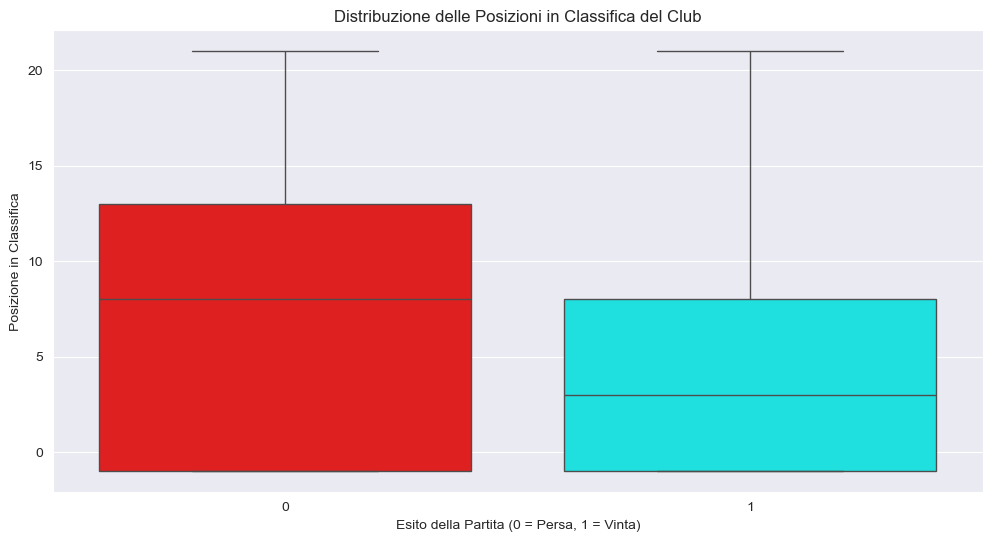

In [9]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='is_win', y='own_position', hue='is_win', palette=['red', 'aqua'], legend=False)
plt.title('Distribuzione delle Posizioni in Classifica del Club')
plt.xlabel('Esito della Partita (0 = Persa, 1 = Vinta)')
plt.ylabel('Posizione in Classifica')
plt.show()

For each match played, the __manager__ of both the home and away teams is available.
We can use this data combined with the win information to calculate the number of __wins per manager__ to identify which managers have the most __success__.


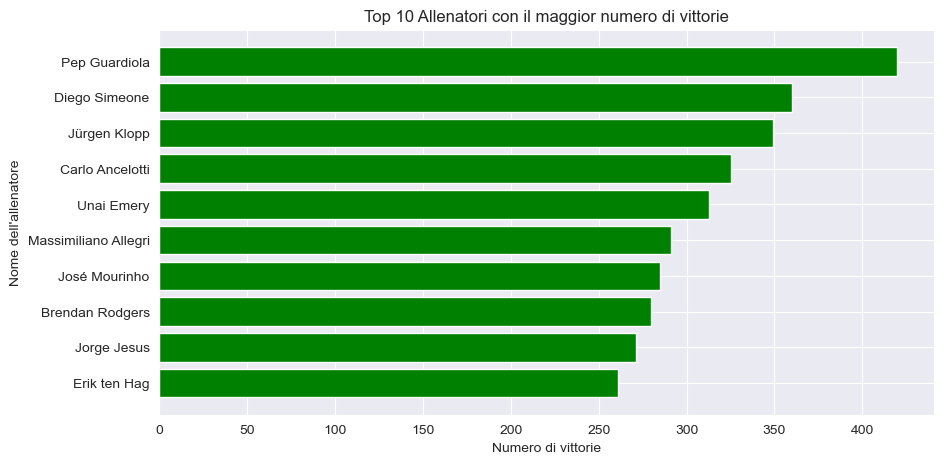

In [10]:
manager_wins = df[(df['is_win'] == 1) & (df['own_manager_name'] != 'Unknown')]['own_manager_name'].value_counts()

top_10_manager_wins = manager_wins[:10]

plt.figure(figsize=(10, 5))
plt.barh(top_10_manager_wins.index, top_10_manager_wins.values, color='green')
plt.xlabel('Numero di vittorie')
plt.ylabel('Nome dell\'allenatore')
plt.title('Top 10 Allenatori con il maggior numero di vittorie')
plt.gca().invert_yaxis()  
plt.show()
